In [1]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("D:/6633253721/2_1/DSDE/dsde-project/cleaned_research_data.csv")

In [3]:
# Preprocessing text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.split()  # Tokenize text
    return text

In [4]:
print(df.columns)

Index(['id', 'authors', 'title', 'references', 'category', 'abstract', 'year',
       'source'],
      dtype='object')


In [5]:
df['processed_text'] = df['abstract'].apply(preprocess_text)

In [6]:
# Prepare sentences for Word2Vec
sentences = df['processed_text'].tolist()

In [7]:
# Train Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

In [8]:
# Save model
model.save("word2vec_model")

In [9]:
def plot_embeddings(word_list, model):
    vectors = [model.wv[word] for word in word_list if word in model.wv]
    words = [word for word in word_list if word in model.wv]

    # Reduce dimensionality using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1], word, fontsize=12)
    plt.title("Word Embedding Visualization")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

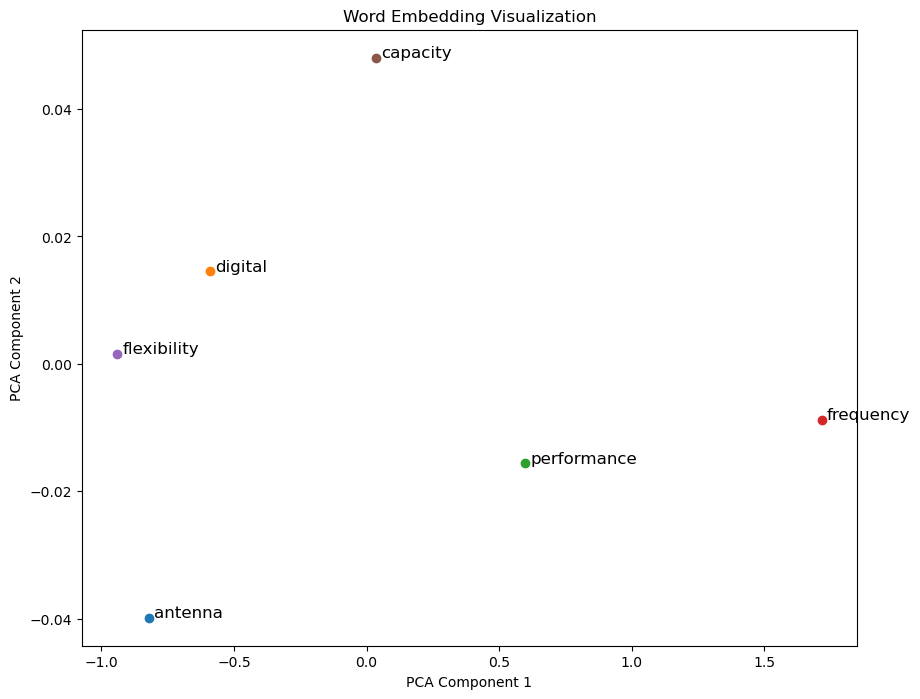

In [14]:
# Example: Visualize specific words
example_words = ['antenna', 'digital', 'performance', 'frequency', 'flexibility', 'capacity']
plot_embeddings(example_words, model)

In [15]:
word_vector = model.wv['first']
print(word_vector)

[-7.19855309e-01  4.78451014e-01  4.04073477e-01  2.46121213e-01
  2.88728565e-01 -7.61926472e-01  5.26353359e-01  1.45055711e+00
 -5.47148228e-01 -5.54199338e-01 -2.51837313e-01 -8.28155398e-01
 -2.23430302e-02  4.17916179e-01 -2.57184297e-01 -3.61955792e-01
  2.58403182e-01 -2.70624280e-01 -1.73429251e-01 -1.46187317e+00
  1.80324763e-01  8.68799910e-02  9.94841933e-01 -3.86596948e-01
  3.17213386e-02 -2.63983399e-01 -4.01450545e-01 -8.26443508e-02
 -3.63231868e-01  2.67137408e-01  6.27710462e-01 -2.33922794e-01
  2.11557880e-01 -7.04279065e-01  5.82141988e-02  4.25719082e-01
  4.09302771e-01 -2.35006303e-01 -2.98376232e-01 -7.09540308e-01
  7.13759847e-03 -5.23018122e-01 -5.93969524e-01  3.33050042e-01
  4.82124567e-01 -4.03505564e-01 -3.74098271e-01 -8.33691210e-02
  2.05838621e-01  2.81260520e-01  2.44259730e-01 -7.07579315e-01
 -3.01383108e-01  1.21447675e-01 -5.41638792e-01  3.07286948e-01
  5.66233516e-01 -1.04144059e-01 -6.70523643e-01  4.22448844e-01
 -1.02013582e-02 -8.92025